In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('../ml-latest-small/ratings.csv')
movies = pd.read_csv('../ml-latest-small/movies.csv')

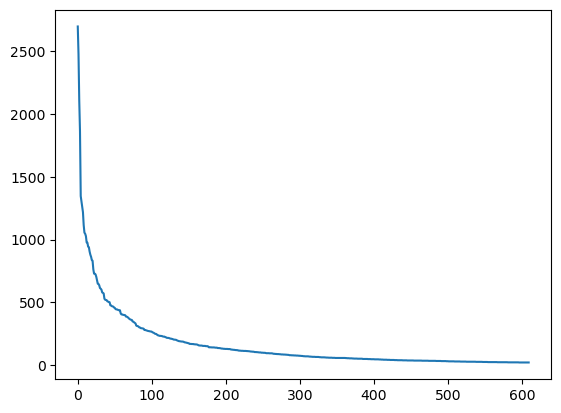

In [3]:
#Q1
users_count = pd.value_counts(ratings['userId'], sort=True, ascending=False).reset_index(name='count')
plt.plot(users_count['count'])
print(end='')

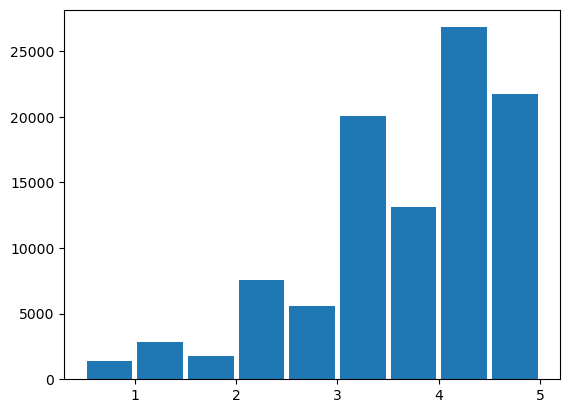

In [4]:
#Q2
bins = np.arange(0.5, 5.5, 0.5)
plt.hist(ratings['rating'], bins, rwidth=0.9)
print(end='')

In [5]:
#Q3
ordered_mean_rating = ratings.groupby(['movieId']).mean().sort_values('rating', ascending=False)
temp_movies = movies[movies.movieId.isin(ordered_mean_rating[:10].index)].copy()
temp_movies = temp_movies.assign(rating=ordered_mean_rating[:10].sort_values('movieId')['rating'].values).sort_values('rating')
temp_movies

,movieId,title,genres,rating
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [6]:
#Q4
# damped_mean = lambda values, mu, k: (np.sum(values) + k * mu) / (np.size(values) + k)
k = 30
global_mean = ratings['rating'].mean()
print(global_mean)

d_rated_movies = ratings.groupby(['movieId'])['rating'].count().to_frame().assign(sum=ratings.groupby(['movieId'])['rating'].sum().values)

d_rated_movies['d_mean'] = d_rated_movies.apply(lambda x: (x['sum'] + k*global_mean) / (x['rating'] + k), axis=1)
d_rated_movies['mean'] = d_rated_movies.apply(lambda x: (x['sum']) / (x['rating']), axis=1)

ordered_d_rated = d_rated_movies.sort_values('d_mean', ascending=False)

temp_d_movies = movies[movies.movieId.isin(ordered_d_rated[:10].index)].copy()
temp_d_movies = temp_d_movies.assign(d_mean=ordered_d_rated[:10].sort_values('movieId')['d_mean'].values).sort_values('d_mean', ascending=False)
temp_d_movies

3.501556983616962


,movieId,title,genres,d_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.348838
659,858,"Godfather, The (1972)",Crime|Drama,4.182643
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.179624
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.153191
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.143362
461,527,Schindler's List (1993),Drama|War,4.138187
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.135153
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.126750
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.125152
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.116646


In [7]:
#Q5
def split(df, ratio=0.8):
    splited = df.sample(frac=1)
    threshold = int(ratio * df.shape[0])
    return (splited[:threshold], splited[threshold:])

def get_mean(userId, train_set, column, global_mean):
    return train_set[train_set.userId == userId][column].iloc[0] if userId in train_set['userId'].values else global_mean

In [8]:
#Q5
(train_q5, test_q5) = split(ratings)
train_q5['mean'] = train_q5.groupby('userId')['rating'].transform('mean')
train_q5.head()

,userId,movieId,rating,timestamp,mean
23342,160,1097,3.0,971113554,2.717514
59229,386,610,3.0,842613889,2.706897
87205,562,3481,4.0,1368893927,4.081006
81344,514,5704,2.0,1534112333,3.301563
44197,294,2041,2.0,966597148,2.631429


In [9]:
#Q5
test_q5['pred'] = test_q5.apply(lambda row: get_mean(row['userId'], train_q5, 'mean', global_mean), axis=1)
test_q5['dif'] = abs(test_q5['pred'] - test_q5['rating'])
print("MAE (MEAN) = ", test_q5['dif'].mean())
test_q5.head()

MAE (MEAN) =  0.7290659961025784


,userId,movieId,rating,timestamp,pred,dif
31165,217,1608,4.0,955940741,2.764092,1.235908
91787,596,1198,3.5,1535627318,3.504658,0.004658
92985,599,1050,4.0,1498499111,2.650350,1.349650
15444,100,6873,4.0,1100186781,3.907895,0.092105
69367,448,4587,3.0,1019128600,2.848307,0.151693


In [10]:
#Q6
k = 30
train_q6, test_q6 = split(ratings)
train_q6['count'] = train_q6.groupby('userId')['rating'].transform('count')
train_q6['sum'] = train_q6.groupby('userId')['rating'].transform('sum')
train_q6['d_mean'] = (train_q6['sum'] + (k * global_mean)) / (train_q6['count'] + k)
train_q6.head()

,userId,movieId,rating,timestamp,count,sum,d_mean
94699,599,66934,2.5,1519140326,1952,5166.5,2.659711
69381,448,4679,3.0,1019127943,1531,4373.0,2.868704
53545,353,292,4.0,831939699,71,252.0,3.535116
59235,387,11,2.5,1117415000,830,2688.5,3.248310
40908,275,4378,5.0,1049077605,333,1345.0,3.994619


In [11]:
#Q6
test_q6['pred'] = test_q6.apply(lambda row: get_mean(row['userId'], train_q6, 'd_mean', global_mean), axis=1)
test_q6['dif'] = abs(test_q6['pred'] - test_q6['rating'])
print("MAE (DAMPED MEAN) = ", test_q6['dif'].mean())
test_q6.head()

MAE (DAMPED MEAN) =  0.7387134397177433


,userId,movieId,rating,timestamp,pred,dif
95477,600,2459,3.0,1237759694,3.024368,0.024368
5740,41,4848,5.0,1459368429,3.292734,1.707266
19014,122,54503,5.0,1461561611,4.419410,0.580590
25232,177,3114,3.5,1435533772,3.384976,0.115024
1776,18,32,4.0,1455209840,3.731674,0.268326
